In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

# Import self-made modules
from project1_code.linear_model import LinearModel
from project1_code.make_and_prepare_data import FrankeFunction, create_design_matrix
from project1_code.model_selection import R2, MSE, cross_validation

# Import plotting functions
from project1_code.plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [2]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 600
test_size = 0.2
error_std = 0
save_fig = False

In [3]:
# Make data
np.random.seed(5)

x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(scale = error_std, size = data_size)

In [7]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []
mses_train_ridge = []
mses_test_ridge = []
mse_train_sk = []
mse_test_sk = []


# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size, random_state=1)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    print(lr.coeffs)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 
    
    lr_ridge = LinearModel(regr_type='ridge', lamb=0.6)
    lr_ridge.fit(X_train, z_train)
    
    z_pred_test_ridge = lr_ridge.predict(X_test)
    z_pred_train_ridge = lr_ridge.predict(X_train)
    
    # Calculate errors for test set
    mses_train_ridge.append(MSE(z_train, z_pred_train_ridge))
    mses_test_ridge.append(MSE(z_test, z_pred_test_ridge))
    
    lr_sk = Ridge(alpha=0.6)
    lr_sk.fit(X_train, z_train)
    print(lr_sk.intercept_, lr_sk.coef_)
    
    print(lr_ridge.coeffs)
    

[ 1.01955028 -0.70281746 -0.51388595]
1.0105687605825322 [-0.69169095 -0.50700145]
[ 0.         -0.69169095 -0.50700145]
[ 1.19034844 -0.83056633 -0.33477655 -1.00787395  0.93032575  0.03859394]
1.0894544168324425 [-0.63720711 -0.39371897 -0.74587995  0.67524456 -0.08897635]
[ 0.         -0.63720711 -0.39371897 -0.74587995  0.67524456 -0.08897635]
[ 0.97267826  1.47816988 -6.95312384  4.92589296 -0.46250184  1.85669618
 -1.54579253 -1.53425054  0.58004481  0.88318088]
1.0900105937130031 [-0.54876838 -0.76170851  0.37110086 -0.58671771  0.34130932 -0.14902717
 -0.37807637  0.56096697  0.07062166]
[ 0.         -0.54876838 -0.76170851  0.37110086 -0.58671771  0.34130932
 -0.14902717 -0.37807637  0.56096697  0.07062166]
[  0.59665768   3.26460009 -12.41649933  11.71993715  -2.66574841
   4.09333658  -1.75069621   1.09332832  -2.56116484 -19.04164005
   7.30266004   1.29869897  24.97619697  -5.31495224 -10.72273477]
1.0746256669631438 [-0.41442248 -0.92747989 -0.16413949  0.68286714 -0.5189

In [5]:
np.mean(z_train)

0.41268700603044267

ValueError: x and y must have same first dimension, but have shapes (7,) and (5,)

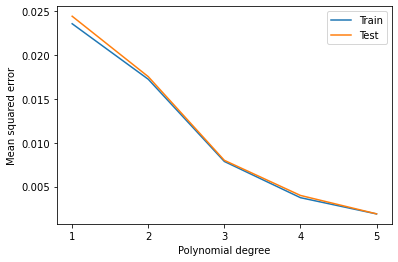

In [6]:
# Plot MSE
plot_mse_per_poldegree([mses_train, mses], ['Train', 'Test'], pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))
# Plot MSE
plt.plot(range(1, 8), mses_train_ridge)
plt.plot(range(1, 8), mses_test_ridge)

In [ ]:
X = np.array([[0,2], [2, 1]])
X

In [ ]:
X + np.identity(2)*0

In [8]:
z

array([1.20386866, 0.10102443, 0.74193197, 0.05293103, 0.5350267 ,
       0.29977348, 0.62452109, 0.13806616, 1.03529116, 0.32945862,
       0.8153398 , 0.15168026, 0.22915813, 0.30140659, 0.14738767,
       0.58901225, 0.43635116, 1.06571578, 0.39236327, 0.43804381,
       0.1232813 , 0.30013235, 0.22522006, 0.34490628, 1.0117937 ,
       0.87460213, 0.46856465, 0.0419049 , 0.05330649, 1.00535144,
       0.70042921, 1.14596102, 0.59452252, 0.1447372 , 0.76163311,
       0.32521691, 0.76786394, 0.42010034, 0.53030024, 0.11371412,
       0.98598974, 0.06990105, 0.31281588, 0.17763642, 0.29291497,
       0.49512783, 0.11810335, 0.7679465 , 0.08477738, 0.09822833,
       0.17474046, 0.03471624, 0.5280565 , 0.27826891, 1.04954214,
       0.51084287, 0.0491359 , 0.30236536, 0.5386482 , 0.49047565,
       0.11972302, 0.32812086, 0.40196603, 0.13094995, 0.37853611,
       0.32706869, 0.69105466, 0.47529561, 0.47683387, 0.08237622,
       0.95176033, 0.26719576, 0.22801177, 1.1869019 , 0.41658